### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from code.utilities import get_df, get_info
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Get Data

In [2]:
df = get_df()

### Analisist

In [3]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,1,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0,...,-9461,-637,12.061121,1,1,0,1,1,0,1
1,1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0,...,-16765,-1188,12.061121,1,1,0,1,1,0,0
2,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0,...,-19046,-225,26.000000,1,1,1,1,1,0,0
3,1,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0,...,-19005,-3039,12.061121,1,1,0,1,0,0,0
4,1,1,0,1,0,121500.0,513000.0,21865.5,513000.0,0,...,-19932,-3038,12.061121,1,1,0,1,0,0,0


In [4]:
# Check Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   NAME_CONTRACT_TYPE          307507 non-null  int64  
 1   CODE_GENDER                 307507 non-null  int64  
 2   FLAG_OWN_CAR                307507 non-null  int64  
 3   FLAG_OWN_REALTY             307507 non-null  int64  
 4   CNT_CHILDREN                307507 non-null  int64  
 5   AMT_INCOME_TOTAL            307507 non-null  float64
 6   AMT_CREDIT                  307507 non-null  float64
 7   AMT_ANNUITY                 307507 non-null  float64
 8   AMT_GOODS_PRICE             307507 non-null  float64
 9   NAME_TYPE_SUITE             307507 non-null  uint8  
 10  NAME_INCOME_TYPE            307507 non-null  uint8  
 11  NAME_EDUCATION_TYPE         307507 non-null  uint8  
 12  NAME_FAMILY_STATUS          307507 non-null  uint8  
 13  NAME_HOUSING_T

In [5]:
print('Proportion of the classes in the data:')
print(round(df['TARGET'].value_counts() / len(df),4) *100)

Proportion of the classes in the data:
0    91.93
1     8.07
Name: TARGET, dtype: float64


#### Split Data to X and y

In [6]:
X, y = np.array(df.loc[:, df.columns != 'TARGET']), np.array(df.loc[:, df.columns == 'TARGET']).reshape(-1, 1)

In [7]:
# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Split X and y to Train and text

In [8]:
# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True, stratify = y)

### Random Forest Witout SMOTE

In [34]:
px.bar(
       x={0:"Didn't pay back",1:"Payed back"},
       y=[df['TARGET'].value_counts()[0], df['TARGET'].value_counts()[1]],
       labels={'y':'Number of People', 'x':''},
       title="Distribution Without SMOTE",
       template='ggplot2'
).show()

In [10]:
rfc = RandomForestClassifier(n_estimators=200)

In [11]:
# fit the model
rfc.fit(X_train, y_train.ravel())

# prediction for testing dataset
test_pred = rfc.predict(X_test)

In [12]:
get_info(y_test.reshape(1, -1)[0], test_pred)

Confusion Matrix - Training Dataset
Predicted      0  1    All
True                      
0          56533  4  56537
1           4963  2   4965
All        61496  6  61502
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56537
           1       0.33      0.00      0.00      4965

    accuracy                           0.92     61502
   macro avg       0.63      0.50      0.48     61502
weighted avg       0.87      0.92      0.88     61502



### Random Forest With SMOTE

In [13]:
sm = SMOTE(random_state = 123)

In [38]:
y_train.ravel()

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

In [35]:
# observe that data has been balanced
px.bar(
       x={0:"Didn't pay back",1:"Payed back"},
       y=[pd.Series(y_train_new).value_counts()[0], pd.Series(y_train_new).value_counts()[1]],
       labels={'y':'Number of People', 'x':''},
       title="Distribution With SMOTE",
       template='ggplot2'
).show()

In [16]:
rfc_sm = RandomForestClassifier(n_estimators=200)

In [17]:
# fit the model
rfc_sm.fit(X_train_new, y_train_new)

# prediction for Testing data
test_pred_sm = rfc_sm.predict(X_test)

In [39]:
get_info(y_test.ravel(), test_pred_sm)

Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          53995  2542  56537
1           4460   505   4965
All        58455  3047  61502
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56537
           1       0.17      0.10      0.13      4965

    accuracy                           0.89     61502
   macro avg       0.54      0.53      0.53     61502
weighted avg       0.86      0.89      0.87     61502



# Test

In [43]:
from imblearn.over_sampling import SMOTE 
rfc_test = RandomForestClassifier(n_estimators=200)
sm = SMOTE(random_state=1)
X, y = sm.fit_resample(X, y)
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)
rfc_test.fit(X_train_test, y_train_test)

RandomForestClassifier(n_estimators=200)

In [44]:
y_pred_test = rfc_test.predict(X_test_test)

In [45]:
get_info(y_test_test, y_pred_test)

Confusion Matrix - Training Dataset
Predicted      0      1     All
True                           
0          53590   2946   56536
1           3560  52977   56537
All        57150  55923  113073
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     56536
           1       0.95      0.94      0.94     56537

    accuracy                           0.94    113073
   macro avg       0.94      0.94      0.94    113073
weighted avg       0.94      0.94      0.94    113073



In [29]:
# from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score

# print('SMOTE class weights Random Forest Test F1: %.3f, Test AUC: %.3f' % \
#       (f1_score(y_pred,y_test), roc_auc_score(y_test, y_pred)))

Logistic Regression Model best F1 score 0.914 at prob decision threshold >= 0.600


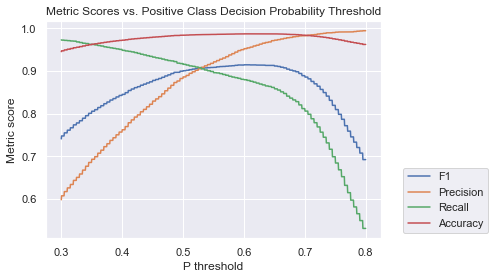

In [32]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.30,.80,1000)
model_val_probs = rfc_test.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [ ]:
# label=["Didn't pay back", "Payed back"]

# fig = go.Figure(data=[
#     go.Bar(name='With SMOTE',
#            x=label,
#            y=w['first']),
#     go.Bar(name='Without SMOTE', 
#            x=label, 
#            y=w['second'])
# ])
# # Change the bar mode
# fig.update_layout(barmode='group')
# fig.show()
